In [107]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
! ls

Iris.csv


In [112]:
%cd /content/gdrive/MyDrive/mlcl

/content/gdrive/MyDrive/mlcl


###Experiment 1 
Implement MLP Classifier on "Titanic dataset". Fine tune the hypermeters. Display confusion matrix, classification report. 

Predict whether a person survived the shipwreck

0 - didn't survive
1 - survived

In [4]:
# Titanic Dataset

# survival 0/1
# pclass ticket class -  1/2/3
# sex
# age
# sibsp - no of siblings/spouses aboard
# parch -  no of parents/children aboard
# ticket - ticket no
# fare -passenger fare
# cabin - cabin no
# embarked - pt of embarkation C-cherbourg/Q-queenstown/S-southampton

In [5]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# reading the dataset

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [7]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

In [8]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [9]:
#exploring data
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [10]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [11]:
# seperate the data into numeric and categorical
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

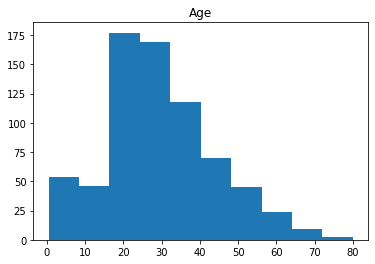

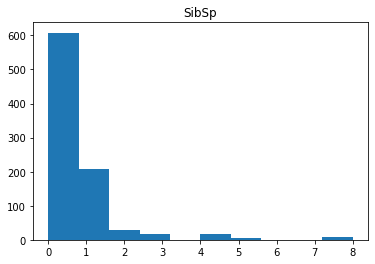

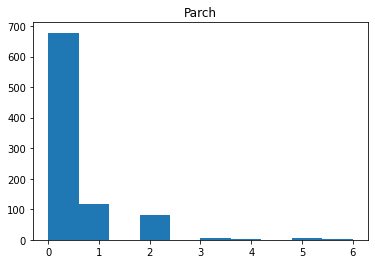

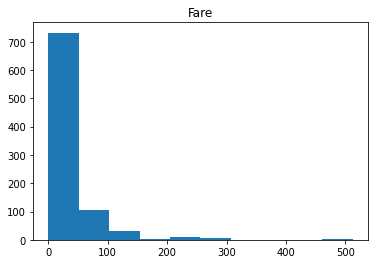

In [12]:
#plots of the numeric data
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

most distributions are scattered
age - pretty normalized

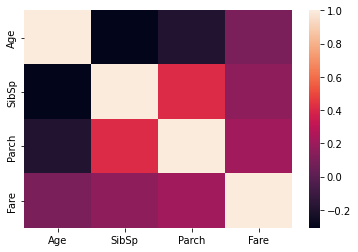

In [13]:
sns.heatmap(df_num.corr())

parch and sibsp has higher correlation (parents travel with kids and spouses together)

In [14]:
#comparing survival rates accross numeric variables
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


inference
1. avg age of survivors - 28 (young people tend to survive more)
2. people who paid higher fare rates were more likely to survive(rich survived)
3. people w parents had a higher chance of surviving
4. people w siblings/spouse had a  lower chances of survival

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


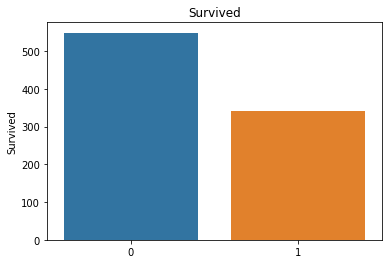

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


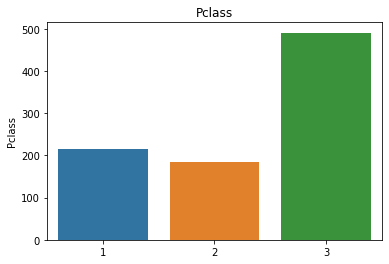

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


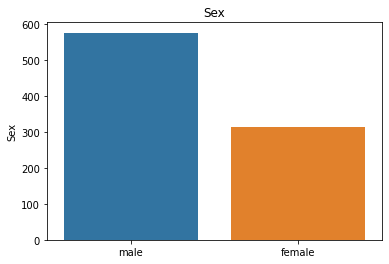

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


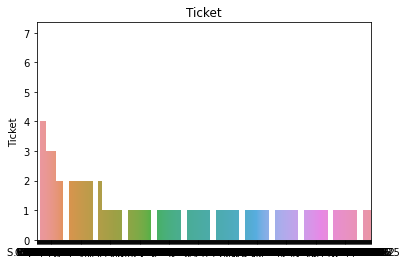

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


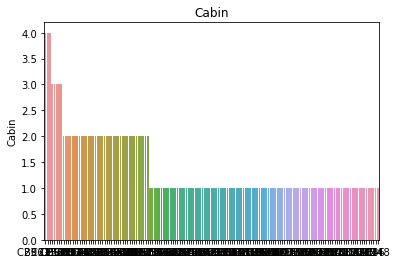

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


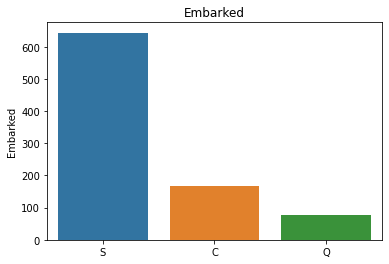

In [15]:
#categorical values
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

cabin,ticket graph - v. messy - need to be feature engineered

###inferences
1. survived - most people died- only 300 survived
2. pclass - majority of people travelling had tickets to 3rdclass
3. sex - males>females (roughly x2)
4. embarked - most passengers boarded ship from Southampton

In [16]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


1. first class people survived more
2. most women survived
3. not v relevant-  cherbourg people had higher chance of living

In [17]:
#Feature Engineering

'''
If we look at the actual cabin data, we see that there’s basically 
a letter and then a number. The letters might signify what type
of cabin it is, where on the ship it is, which floor, 
which Class it is for, etc.And the numbers might signify the 
Cabin number. Let us first split them into individual cabins and
see whether someone owned more than a single cabin.
'''


df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [18]:
#only a few people owned more than one cabins. Now let’s see whether the survival rates depend on this:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
#let us look at the actual letter of the cabin they were in. So you could expect that the cabins with the same letter are roughly in the same locations, or on the same floors, and logically if a cabin was near the lifeboats, they had a better chance of survival. Let us look into that:

# n stands for null
# in this case we will treat null values like it's own category
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
#divide the tickets into numeric and non-numeric for efficient usage:

training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

In [21]:
#title of individual passengers. 

training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
training['name_title'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

Data preprocessing


1. Drop the null values from the Embarked column
2. Include only relevant data
3. Categorically transform all of the data, using something called a transformer.
4. Impute data with the central tendencies for age and fare.
5. Normalize the fare column to have a more normal distribution.
6. using standard scaler scale data 0-1

In [113]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [114]:
dataset = pd.read_csv('train.csv')

In [115]:
dataset.shape

(891, 12)

In [116]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
dataset = dataset.drop(['Name', 'PassengerId', 'Ticket'], axis='columns')

In [37]:
print(dataset.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [38]:
print(dataset)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [41]:
dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['Embarked']=le.fit_transform(dataset['Embarked'])

In [42]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,2
1,1,1,0,38.0,1,0,71.2833,C85,0
2,1,3,0,26.0,0,0,7.9250,NaN,2
3,1,1,0,35.0,1,0,53.1000,C123,2
4,0,3,1,35.0,0,0,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,2
887,1,1,0,19.0,0,0,30.0000,B42,2
888,0,3,0,NaN,1,2,23.4500,NaN,2
889,1,1,1,26.0,0,0,30.0000,C148,0


In [43]:
dataset.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [44]:
dataset['Age'] = dataset['Age'].fillna(value=dataset['Age'].mean())

In [47]:
dataset = dataset.drop(['Cabin'], axis='columns')

In [48]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
dataset.shape

(891, 8)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
X = dataset.iloc[:,1:7]

In [52]:
Y = dataset['Survived']

In [53]:
X_std=scaler.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test= train_test_split(X_std,Y,test_size=0.3,random_state=0)

In [72]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(590),activation='relu')

In [73]:
mlp.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=590)

In [74]:
mlp.score(x_train,y_train)*100

85.23274478330659

In [75]:
mlp.score(x_test,y_test)*100

80.59701492537313

In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(150,200),activation='relu',solver='adam')

In [77]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(150, 200))

In [78]:
mlp.score(x_train,y_train)*100

85.23274478330659

In [79]:
mlp.score(x_test,y_test)*100

81.34328358208955

In [80]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [81]:
y_pred=mlp.predict(x_test)

In [82]:
print(y_pred)

[0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


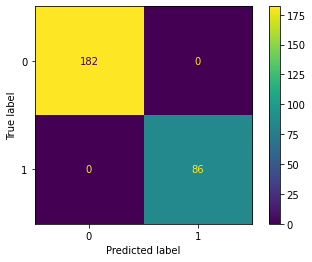

In [83]:
plot_confusion_matrix(mlp,x_test,y_pred)

In [84]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       168
           1       0.79      0.68      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [110]:
%cd /content/gdrive/MyDrive/mlcl/house

/content/gdrive/MyDrive/mlcl/house


In [111]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [91]:
data  = pd.read_csv('Iris.csv')

In [93]:
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
data.shape

(150, 6)

In [95]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le = LabelEncoder()

In [98]:
data['Species']= le.fit_transform(data['Species'])

In [99]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [105]:
data['Species'].unique()

array([0, 1, 2])

In [106]:
from sklearn.model_selection import train_test_split